In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM

numero_de_pontos = 4000
#Parâmetros do guia
n1 = 1.45
n2 = 3.45
n3 = 1.45
d1 = 0
d2 = 0.25e-6
d3 = 0
lmbd = 1550e-9

k0 = 2*np.pi/lmbd
neff = np.linspace(n1*1.0001, n2*0.9999, numero_de_pontos)
beta = neff*k0

alpha1 = SM.sqrt(beta**2 - (k0*n1)**2)
alpha2 = SM.sqrt(beta**2 - (k0*n2)**2)
alpha3 = SM.sqrt(beta**2 - (k0*n3)**2)
sigma2 = alpha2*d2

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$n_{eff}$')

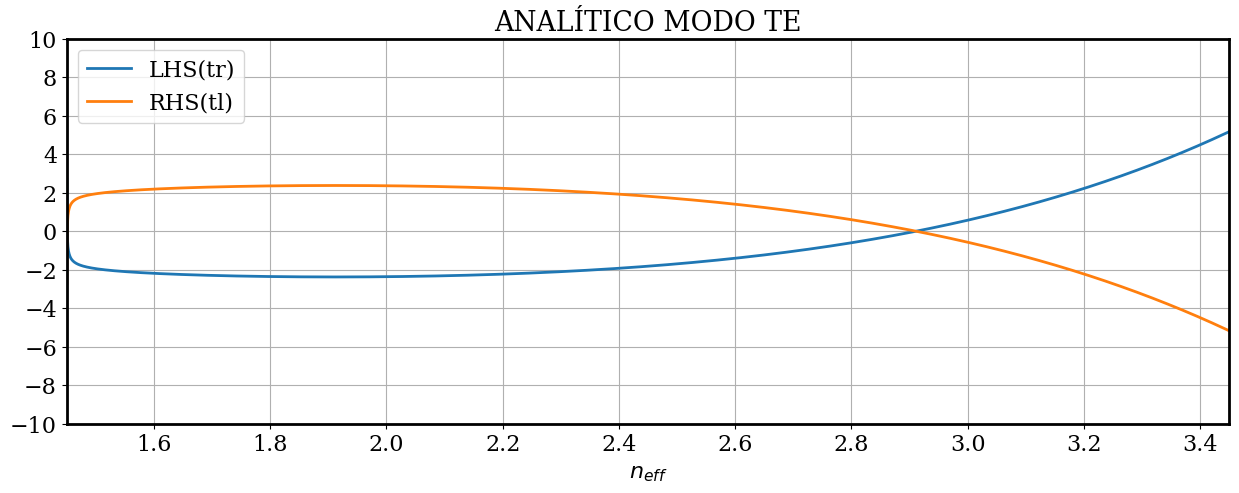

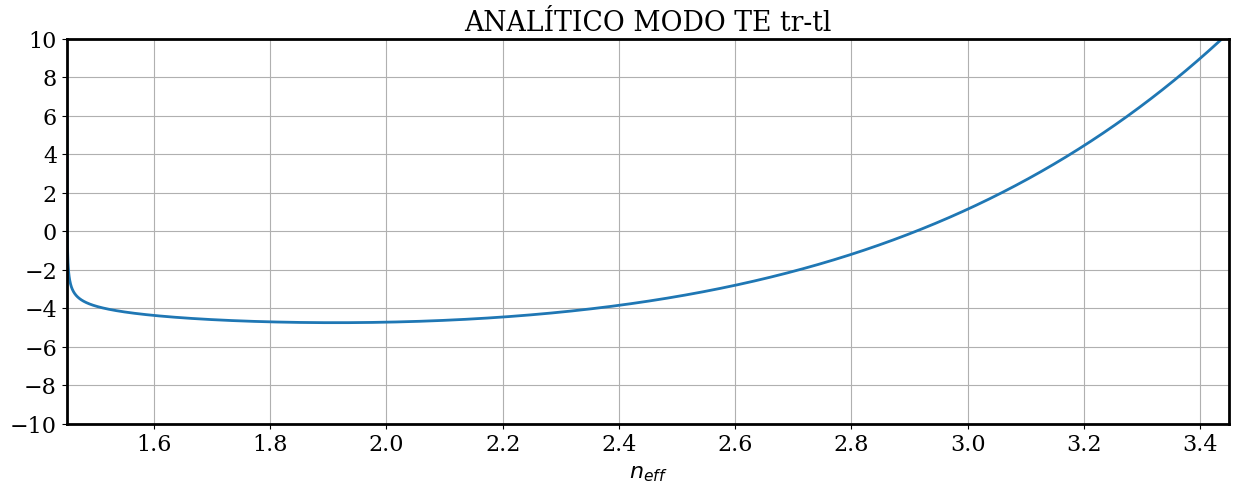

In [2]:
# @title Exemplo 3: Solução analítica para o Modo TE

# T11 = tr + tl = 0
tr = (1 + alpha2/alpha3)*(1 + alpha1/alpha2)*np.exp(sigma2)
tl = -(1 - alpha2/alpha3)*(1 - alpha1/alpha2)*np.exp(-sigma2)

#Solução gráfica
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1 = plt.figure(figsize=(15,5))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(neff, tr, linewidth = 2, label = 'LHS(tr)')
plt.plot(neff, tl, linewidth = 2, label = 'RHS(tl)')
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.xlabel(r'$n_{eff}$')
plt.title('ANALÍTICO MODO TE')
plt.legend(loc = 'upper left')
plt.grid(True)

fig2 = plt.figure(figsize=(15,5))
plt.plot(neff, tr-tl, linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.grid(True)
plt.title('ANALÍTICO MODO TE tr-tl')
plt.xlabel(r'$n_{eff}$')

Text(0.5, 0, '$n_{eff}$')

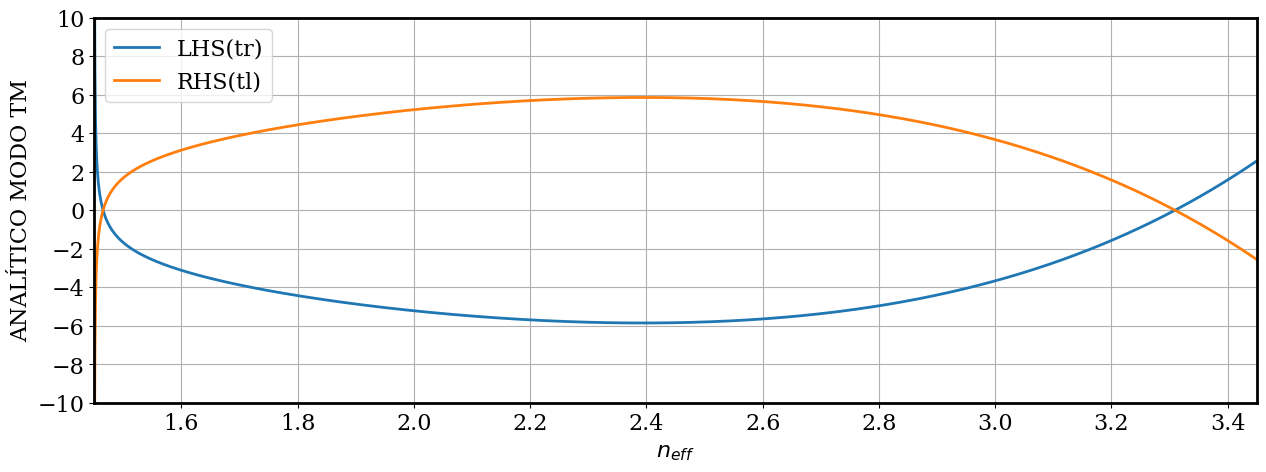

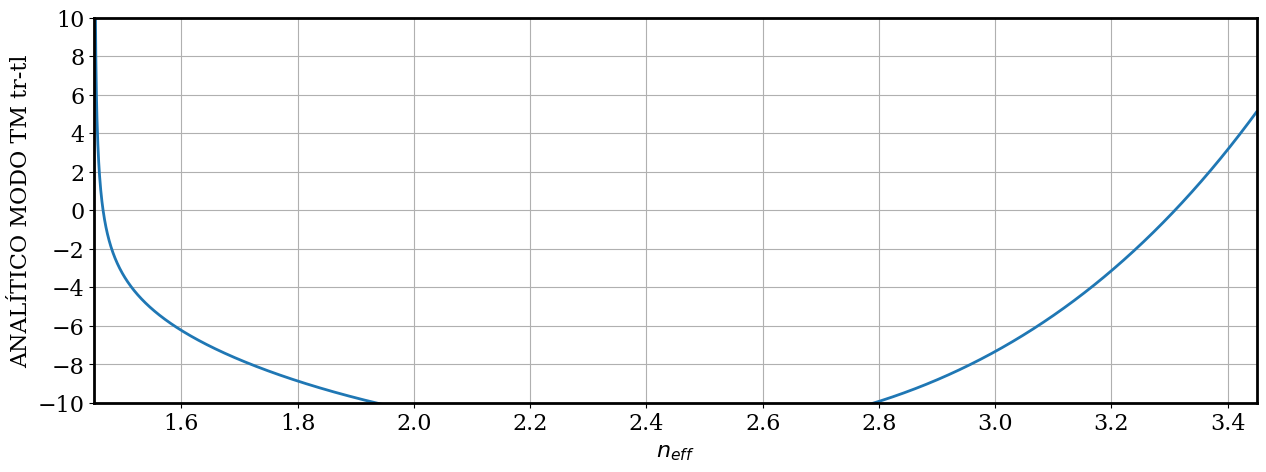

In [3]:
# @title Exemplo 3: Solução Analítica para o Modo TM

p1 = (n1/n2)**2
p2 = (n2/n3)**2
# T11 = tr + tl = 0
trm = (1 + p2*alpha2/alpha3)*(1 + p1*alpha1/alpha2)*np.exp(sigma2)
tlm = -(1 - p2*alpha2/alpha3)*(1 - p1*alpha1/alpha2)*np.exp(-sigma2)

#Solução gráfica
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1 = plt.figure(figsize=(15,5))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(neff, trm, linewidth = 2, label = 'LHS(tr)')
plt.plot(neff, tlm, linewidth = 2, label = 'RHS(tl)')
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.xlabel(r'$n_{eff}$')
plt.ylabel('ANALÍTICO MODO TM')
plt.legend(loc = 'upper left')
plt.grid(True)

fig2 = plt.figure(figsize=(15,5))
plt.plot(neff, trm-tlm, linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-10,10])
plt.grid(True)
plt.ylabel('ANALÍTICO MODO TM tr-tl')
plt.xlabel(r'$n_{eff}$')


Neff: [2.911365341335334]



<ipython-input-4-f5eb54ac4493>:23: RuntimeWarning: divide by zero encountered in divide
  Tj[0,0,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:23: RuntimeWarning: invalid value encountered in divide
  Tj[0,0,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:24: RuntimeWarning: divide by zero encountered in divide
  Tj[0,1,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:24: RuntimeWarning: invalid value encountered in divide
  Tj[0,1,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:25: RuntimeWarning: divide by zero encountered in divide
  Tj[1,0,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:25: RuntimeWarning: invalid value encountered in divide
  Tj[1,0,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-4-f5eb54ac4493>:26: RuntimeWarning: divide by zero encountered in divide
  T

Text(0.5, 1.0, 'MODO TE - TMM')

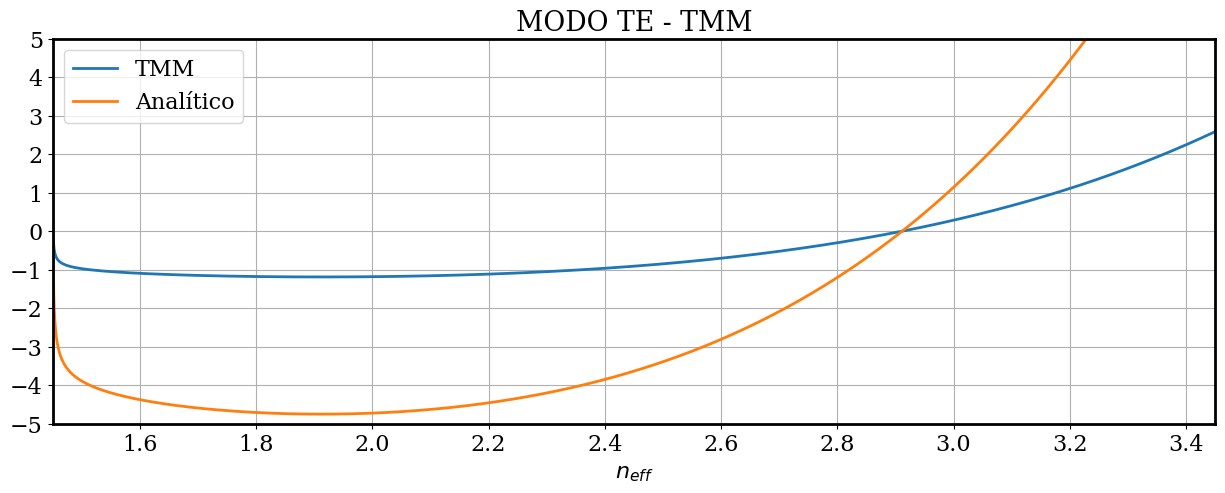

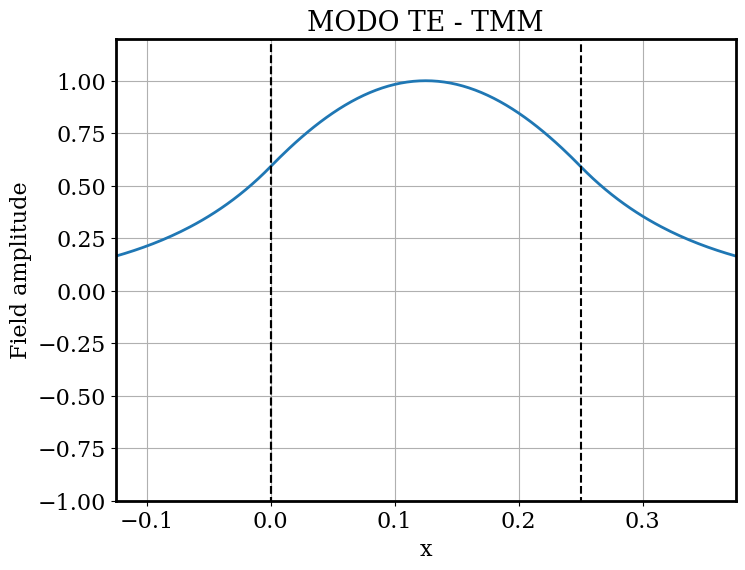

In [4]:
# @title Exemplo 3: Solução usando TMM para modo TE

n = np.array([n1,n2,n3])
d = np.array([d1,d2,d3])
nmbOfLayers = np.size(n)

neff = np.linspace(n[0], n[1], numero_de_pontos)
beta = neff*k0

alpha = np.zeros([numero_de_pontos, nmbOfLayers], dtype=np.complex_)
sigma = np.zeros([numero_de_pontos, nmbOfLayers], dtype=np.complex_)

alpha[:,0] = SM.sqrt(beta**2 - (k0*n[0])**2)
sigma[:,0] = alpha[:,0]*d[0]
Twg = np.zeros([2, 2, numero_de_pontos], dtype=np.complex_)
Twg[0,0,:] = 1
Twg[1,1,:] = 1

Tj = np.zeros([2, 2, numero_de_pontos], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  alpha[:,i+1] = SM.sqrt(beta**2 - (k0*n[i+1])**2)
  sigma[:,i+1] = alpha[:,i+1]*d[i+1]
  Tj[0,0,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[0,1,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Tj[1,0,:] = (1-alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[1,1,:] = (1+alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Twg = np.einsum('mnr,ndr->mdr', Tj, Twg)

# Determinando o valor de neff para Twg igual a zero:
delta = 1e-3
neffzero = []
for i in range(numero_de_pontos):
    if (Twg[0,0,i] > -delta) and (Twg[0,0,i] < delta):
        neffzero.append(neff[i])

print(f'\nNeff: {neffzero}\n')

# Plots:
fig3 = plt.figure(figsize=(15,5))
plt.plot(neff, Twg[0,0,:], label = 'TMM', linewidth = 2)
plt.plot(neff, tr-tl, label = 'Analítico', linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-5,5])
plt.grid(True)
plt.title('MODO TE - TMM')
plt.xlabel(r'$n_{eff}$')
plt.legend(loc = 'upper left')

#Definindo o modo de operação
neff = neffzero[-1]
beta = neff*k0

alpha = SM.sqrt(beta**2 - (k0*n)**2)
sigma = alpha*d

A = np.zeros(nmbOfLayers, dtype=np.complex_)
B = np.zeros(nmbOfLayers, dtype=np.complex_)
# Equation 16
A[0] = 1
B[0] = 0

Tj = np.zeros([2, 2], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  Tj[0,0] = (1+alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[0,1] = (1-alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  Tj[1,0] = (1-alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[1,1] = (1+alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  #Equation 13
  A[i+1] = Tj[0,0] * A[i] + Tj[0,1] * B[i]
  B[i+1] = Tj[1,0] * A[i] + Tj[1,1] * B[i]

t  = np.cumsum(d)
lS = np.insert(t, 0, 0)
if d[0] == 0.0:
    csL = d2/2
    t = np.insert(t, 0, -csL)
    t[-1] = t[-1] + csL
else:
    t = np.insert(t, 0, 0)
    t[-1] = t[-1] + d[-1]

dx = np.sum(d)/100
Ey_j = []
lent = []
for i in range(nmbOfLayers):
    len = np.arange(t[i], t[i+1], dx)
    # Equation 4
    E_temp = A[i] * np.exp(+alpha[i] * (len - lS[i])) + B[i] * np.exp(-alpha[i] * (len - lS[i]))
    Ey_j = np.hstack((Ey_j, E_temp))
    lent = np.hstack((lent, len))

fig4 = plt.figure(figsize=(8,6))
plt.plot(lent/1e-6, np.real(Ey_j/Ey_j.max()), linewidth = 2)
for i in range(nmbOfLayers):
  plt.plot(np.array([lS[i],lS[i]])/1e-6, [-1.5,1.5], 'k--')
plt.grid()
plt.xlim([lent.min()/1e-6,lent.max()/1e-6])
plt.ylim([-1,1.2])
plt.xlabel('x')
plt.ylabel('Field amplitude')
plt.title('MODO TE - TMM')


Zero: [1.4650037509377345, 3.3084646161540388, 3.3089647411852967, 3.3094648662165542, 3.309964991247812, 3.3104651162790697]



<ipython-input-5-8dbd2924249e>:23: RuntimeWarning: divide by zero encountered in divide
  Tj[0,0,:] = (1 + p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:23: RuntimeWarning: invalid value encountered in divide
  Tj[0,0,:] = (1 + p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:24: RuntimeWarning: divide by zero encountered in divide
  Tj[0,1,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:24: RuntimeWarning: invalid value encountered in divide
  Tj[0,1,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:25: RuntimeWarning: divide by zero encountered in divide
  Tj[1,0,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:25: RuntimeWarning: invalid value encountered in divide
  Tj[1,0,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
<ipython-input-5-8dbd2924249e>:26: RuntimeWarning

Text(0.5, 1.0, 'MODO TM - TMM')

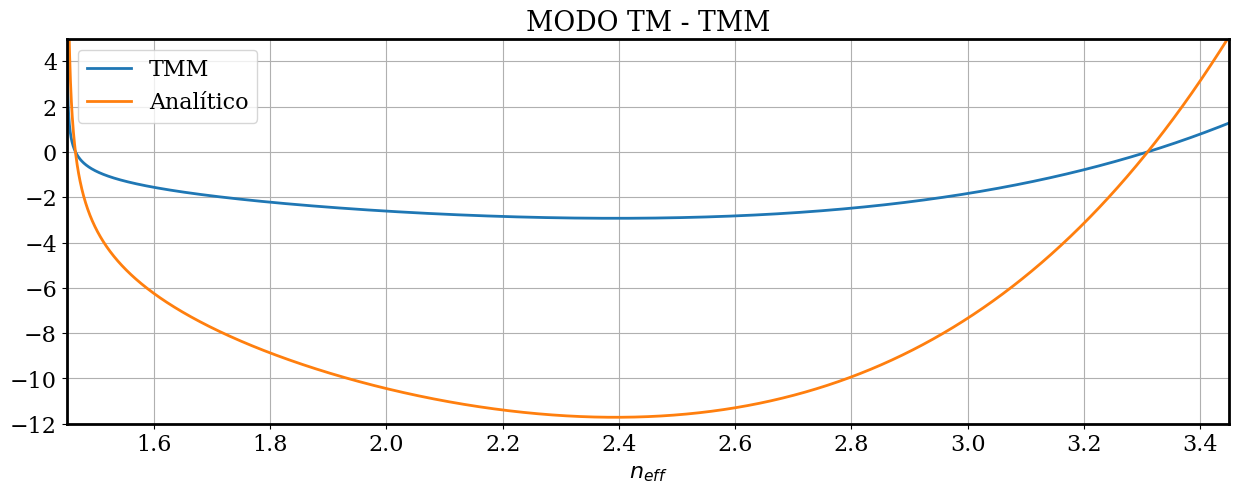

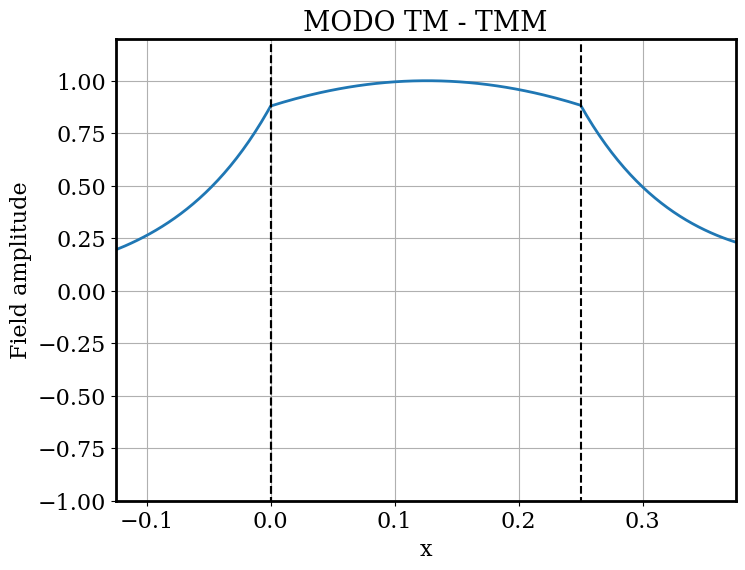

In [5]:
# @title Exemplo 3: Solução usando TMM para modo TM

neff = np.linspace(n[0], n[1], numero_de_pontos)
beta = neff*k0

alpha = np.zeros([numero_de_pontos, nmbOfLayers], dtype=np.complex_)
sigma = np.zeros([numero_de_pontos, nmbOfLayers], dtype=np.complex_)
p = np.array([(n1/n2)**2, (n2/n3)**2, 8912])


alpha[:,0] = SM.sqrt(beta**2 - (k0*n[0])**2)
sigma[:,0] = alpha[:,0]*d[0]

Twg = np.zeros([2, 2, numero_de_pontos], dtype=np.complex_)
Twg[0,0,:] = 1
Twg[1,1,:] = 1

Tj = np.zeros([2, 2, numero_de_pontos], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  alpha[:,i+1] = SM.sqrt(beta**2 - (k0*n[i+1])**2)
  sigma[:,i+1] = alpha[:,i+1]*d[i+1]

  Tj[0,0,:] = (1 + p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[0,1,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Tj[1,0,:] = (1 - p[i]*alpha[:,i]/alpha[:,i+1])*np.exp( sigma[:,i])/2
  Tj[1,1,:] = (1 + p[i]*alpha[:,i]/alpha[:,i+1])*np.exp(-sigma[:,i])/2
  Twg = np.einsum('mnr,ndr->mdr', Tj, Twg)

# Determinando o valor de neff para Twg igual a zero:
delta = 1e-2
neffzero = []
for i in range(numero_de_pontos):
    if (Twg[0,0,i] > -delta) and (Twg[0,0,i] < delta):
        neffzero.append(neff[i])

print(f'\nZero: {neffzero}\n')

# Plots:
fig3 = plt.figure(figsize=(15,5))
plt.plot(neff, Twg[0,0,:], label = 'TMM', linewidth = 2)
plt.plot(neff, trm-tlm, label = 'Analítico', linewidth = 2)
plt.locator_params(nbins=16)
plt.xlim([n1, n2])
plt.ylim([-12,5])
plt.grid(True)
plt.title('MODO TM - TMM')
plt.xlabel(r'$n_{eff}$')
plt.legend(loc = 'upper left')

#Definindo o modo de operação
neff = neffzero[-1]
beta = neff*k0

alpha = SM.sqrt(beta**2 - (k0*n)**2)
sigma = alpha*d

A = np.zeros(nmbOfLayers, dtype=np.complex_)
B = np.zeros(nmbOfLayers, dtype=np.complex_)
# Equation 16
A[0] = 1
B[0] = 0

Tj = np.zeros([2, 2], dtype=np.complex_)
for i in range(nmbOfLayers-1):
  Tj[0,0] = (1 + p[i]*alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[0,1] = (1 - p[i]*alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  Tj[1,0] = (1 - p[i]*alpha[i]/alpha[i+1])*np.exp( sigma[i])/2
  Tj[1,1] = (1 + p[i]*alpha[i]/alpha[i+1])*np.exp(-sigma[i])/2
  #Equation 13
  A[i+1] = Tj[0,0] * A[i] + Tj[0,1] * B[i]
  B[i+1] = Tj[1,0] * A[i] + Tj[1,1] * B[i]

t  = np.cumsum(d)
lS = np.insert(t, 0, 0)
if d[0] == 0.0:
    csL = d2/2
    t = np.insert(t, 0, -csL)
    t[-1] = t[-1] + csL
else:
    t = np.insert(t, 0, 0)
    t[-1] = t[-1] + d[-1]

dx = np.sum(d)/100
Hy_j = []
lent = []
for i in range(nmbOfLayers):
    len = np.arange(t[i], t[i+1], dx)
    # Equation 4
    H_temp = A[i] * np.exp(+alpha[i] * (len - lS[i])) + B[i] * np.exp(-alpha[i] * (len - lS[i]))
    Hy_j = np.hstack((Hy_j, H_temp))
    lent = np.hstack((lent, len))

fig4 = plt.figure(figsize=(8,6))
plt.plot(lent/1e-6, np.real(Hy_j/Hy_j.max()), linewidth = 2)
for i in range(nmbOfLayers):
  plt.plot(np.array([lS[i],lS[i]])/1e-6, [-1.5,1.5], 'k--')
plt.grid()
plt.xlim([lent.min()/1e-6,lent.max()/1e-6])
plt.ylim([-1,1.2])
plt.xlabel('x')
plt.ylabel('Field amplitude')
plt.title('MODO TM - TMM')